<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#fifa-analysis:-replacements-part-2" data-toc-modified-id="fifa-analysis:-replacements-part-2-1">fifa analysis: replacements part 2</a></span><ul class="toc-item"><li><span><a href="#summary" data-toc-modified-id="summary-1.1">summary</a></span></li><li><span><a href="#context" data-toc-modified-id="context-1.2">context</a></span></li><li><span><a href="#data" data-toc-modified-id="data-1.3">data</a></span></li><li><span><a href="#key-features" data-toc-modified-id="key-features-1.4">key features</a></span></li></ul></li><li><span><a href="#normalize-for-age" data-toc-modified-id="normalize-for-age-2">normalize for age</a></span><ul class="toc-item"><li><span><a href="#problem" data-toc-modified-id="problem-2.1">problem</a></span></li><li><span><a href="#hypothesis" data-toc-modified-id="hypothesis-2.2">hypothesis</a></span></li><li><span><a href="#assumptions" data-toc-modified-id="assumptions-2.3">assumptions</a></span></li><li><span><a href="#procedure" data-toc-modified-id="procedure-2.4">procedure</a></span><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-2.4.1">imports</a></span></li><li><span><a href="#predict-overall-given-age" data-toc-modified-id="predict-overall-given-age-2.4.2">predict overall given age</a></span></li><li><span><a href="#compute-coefficient" data-toc-modified-id="compute-coefficient-2.4.3">compute coefficient</a></span></li><li><span><a href="#filter-with-age-adjusted-overall" data-toc-modified-id="filter-with-age-adjusted-overall-2.4.4">filter with age-adjusted overall</a></span></li><li><span><a href="#bar-plot-comparison" data-toc-modified-id="bar-plot-comparison-2.4.5">bar plot comparison</a></span></li></ul></li></ul></li><li><span><a href="#conclusion" data-toc-modified-id="conclusion-3">conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#further-study" data-toc-modified-id="further-study-3.0.1">further study</a></span></li></ul></li></ul></li></ul></div>

# fifa analysis: replacements part 2
[part 1 can be found here](replacements_part1.ipynb)

---

## summary
* My goal is to suggest replacements for bad players on a given team.
* I search for replacements based on skill (normalized for age), wage, and position.


## context
This is an exercise I have created to practice analytics. I am using a dataset from kaggle.com that represents individual fifa players. My goal is to provide insights for a team manager from the data. I assume that the team manager wants to optimize for the most skilled team that brings the most money.
   
## data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

## key features
* Overall: overall rating of a player, on a scale from 1 to 100.
* Potential: the highest overall rating a player could progress to.
* Value: current market value of a player, annually
* Wage: the weekly wage of a player
---


---
# normalize for age

## problem
We are currently comparing players on their Overall skill across different ages. There is a positive correlation of 0.46 between Age and Overall. So our comparison is faulty.


## hypothesis
We can fix our comparison by normalizing for age. See the procedure below for the normalization function.

## assumptions
* we can treat age as a discrete value
* age is a proxy for experience
* establishing causality: more experience leads to more skill. the positive correlation we observed between age and overall confirms that this general trend is true for the sample. therefore we can say that higher age causes higher skill.
* we can normalize by equalizing all geometric means
* younger players will get better over time
* comparing players skill after normalizing for age is a good way to determine replacements
* while our data only represents 1 year, building a good team requires a sense of multiple years

## procedure
* group Overall by age (treating age as a discrete value)
* calculate the geometric mean for each group
* identify the median mean amongst all groups
* calculate the coefficient for each group so that each group mean equals the median mean
* multiply Overallby the coefficient that corresponds to age
* use the age_adjusted_overall in the replacements filter

### imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
players = pd.read_csv("data/complete_dataset_replacements_part1.csv",index_col='index')
players.head()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RF,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst
index,,,,,,,,,,,,,,,,,,,,,
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,91.0,89.0,92.0,91.0,66.0,92.0,92.0,"['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST']","['ST', 'LW']",0.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,92.0,90.0,88.0,91.0,62.0,88.0,92.0,"['CAM', 'CF', 'LAM', 'LF', 'LW', 'RAM', 'RF', ...",['RW'],0.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,88.0,87.0,84.0,89.0,64.0,84.0,89.0,"['CAM', 'CF', 'LAM', 'LF', 'LW', 'RAM', 'RF', ...",['LW'],0.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,88.0,85.0,88.0,87.0,68.0,88.0,88.0,"['CAM', 'CF', 'LAM', 'LF', 'LS', 'LW', 'RAM', ...",['ST'],0.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0


### predict overall given age

In [12]:
# todo

### compute coefficient

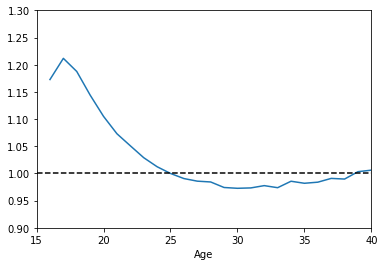

In [13]:
import scipy.stats.mstats as mstats

# use a geometric mean because overall only makes sense relative to other scores
means = players.groupby('Age')['Overall'].apply(mstats.gmean)

# take the median of these means, to avoid the effect of outliers
# normalizing to the median allows for easier comparison of the values,
# and does not shift the adjusted dataset away from the original
median = means.median()

coefficients = median/means
ax = coefficients.plot(xlim=(15,40),ylim=(0.9,1.3))
ax.axhline(1, ls='--',color='black')

# this graph shows the coefficients for every age.
# what insight does this give?

In [14]:
def multiplyCoefficient(row):
    return coefficients.loc[row['Age']] * row['Overall']
    
players['age_adjusted_overall'] = players.apply(multiplyCoefficient,axis=1)
players['age_adjusted_overall'].head()

index
0    91.892183
1    90.457849
2    92.000000
3    89.485184
4    89.550407
Name: age_adjusted_overall, dtype: float64

### filter with age-adjusted overall

In [15]:
# find madrid's worst player
madrid = players[players["Club"] == "Real Madrid CF"]
worst_index = madrid["Overall"].argmin()
worst = players.loc[worst_index]

# use the age_adjusted_overall in the replacements filter
# age_replacements = players[
#     (players['age_adjusted_overall'] >= 1.1 * worst['age_adjusted_overall']) &
#     (players["Value"] >= 10 * worst["Value"]) &
#     (players["Wage"]  < 0.5 * worst["Wage"]) &
#     (players["Club"] != "Real Madrid CF") &
#     (players['overlap_with_worst'] >= .5)
# ]
# age_replacements
# running this with the old filters now returns no results
# I need to reduce the expectations in order to get good replacements
age_replacements = players[
    (players['age_adjusted_overall'] >= 1.04 * worst['age_adjusted_overall']) &
    (players["Value"] >= 0.5 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF") &
    (players['overlap_with_worst'] >= .5)
]
age_replacements

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst,age_adjusted_overall
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.928620
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,79.231715
7865,J. Bijlow,19,https://cdn.sofifa.org/48/18/players/232229.png,Netherlands,https://cdn.sofifa.org/flags/34.png,67,80,Feyenoord,https://cdn.sofifa.org/24/18/teams/246.png,1100000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.656771
10016,P. Dahlberg,18,https://cdn.sofifa.org/48/18/players/233763.png,Sweden,https://cdn.sofifa.org/flags/46.png,65,78,IFK Göteborg,https://cdn.sofifa.org/24/18/teams/319.png,775000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,77.192029
12715,M. Svilar,17,https://cdn.sofifa.org/48/18/players/230872.png,Belgium,https://cdn.sofifa.org/flags/7.png,63,83,SL Benfica,https://cdn.sofifa.org/24/18/teams/234.png,600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.336718


In [16]:
# what is the overlap between age_replacements and position_replacements?

# combine the position filter with the other filters
position_replacements = players[
    (players['Overall'] >= 1.1 * worst['Overall']) &
    (players["Value"] >= 10 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF") &
    (players['overlap_with_worst'] >= .5)
]

overlap = set(age_replacements.index).intersection(set(position_replacements.index))
print('overlap = ',len(overlap),'/',len(set(age_replacements.index)))
age_replacements.loc[overlap]

# apparently adjusting by age made a big difference in our recommendation

overlap =  2 / 5


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst,age_adjusted_overall
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,76.928620
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,79.231715


### bar plot comparison

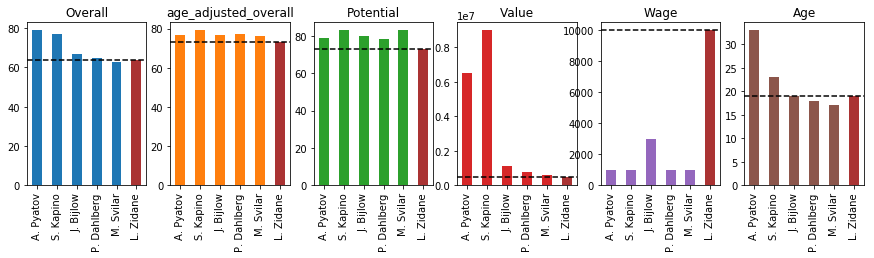

In [17]:
# create visualization to compare differences between replacements and current player

# add the worst player to the comparison
worst = players.loc[worst_index]
comparison = age_replacements.append(worst)

columns = ['Overall','age_adjusted_overall','Potential','Value','Wage','Age','Name']

ax = comparison[columns]\
    .plot(x='Name',kind='bar',subplots=True,legend=False,figsize=(15,3),layout=(1,6))


for index,subplot in enumerate(ax[0]):
    worst_value = comparison.loc[worst_index][columns[index]]
    subplot.axhline(worst_value, ls='--', color='black')
    subplot.set_xlabel('')
    subplot.patches[-1].set_facecolor('#aa3333')

# conclusion
this is a better recommendation. However, the age-adjusted overall margin is only 4%. This means that the recommended players are only at least 4% better than our player. The question is whether that is statistically significant? If it is not, then we need to reconsider if we need to try to recruit players with a higher wage.

An improved version of this analysis needs player data over time. While we can predict how much better a player is going to get as he ages, this is done without any timeseries data. we simply assume that the trajectories of skill development are represented in the snapshot thanks to the variation in age across players.

### further study
* is a 4% on age-adjusted_overall statistically significant? 
    * is this a meaningful question?
* by how much do we need to raise the wage ceiling to get players that are worth trying to recruit?
    * what is the cost of recruiting a player?
    * what determines how likely a player is willing to change teams?

In [18]:
#write to external file
players.to_csv('data/complete_dataset_replacements_part2.csv')